# House Price Prediction - Notebook

This notebook provides a step-by-step workflow for predicting house prices using various regression models.

## 1. Import Libraries

Import all necessary libraries for data manipulation, visualization, and modeling, including pandas, numpy, matplotlib, seaborn, and scikit-learn modules.

In [57]:
# Basic libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler

# Regression libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

## 2. Load Data

Load the training and test datasets from CSV files using pandas.

In [58]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

## 3. Initial Data Exploration

Explore the dataset structure using `.columns`, `.info()`, `.head()`, `.describe()`, and check data types for numerical and categorical features.

In [59]:
# View column names
train_df.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [60]:

# View info about the dataset
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [61]:

# Preview the first few rows
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [62]:

# Statistical summary
train_df.describe()

# Check numerical feature types
train_df.dtypes[train_df.dtypes != 'object']

# Check categorical feature types
train_df.dtypes[train_df.dtypes == 'object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

## 4. Visualize Feature Relationships

Create scatter plots to visualize relationships between key features and SalePrice, identifying trends and potential outliers.

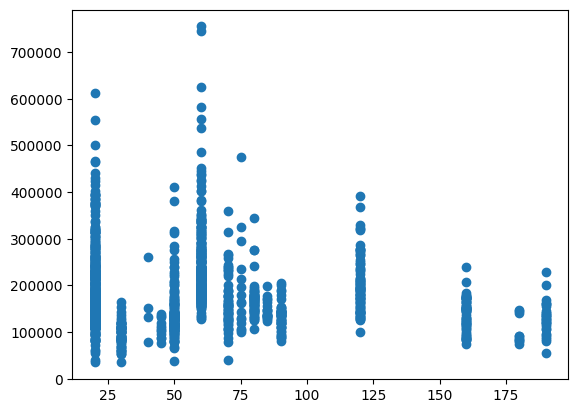

In [63]:
# Visualize MSSubClass vs SalePrice
plt.scatter(x='MSSubClass', y='SalePrice', data=train_df)


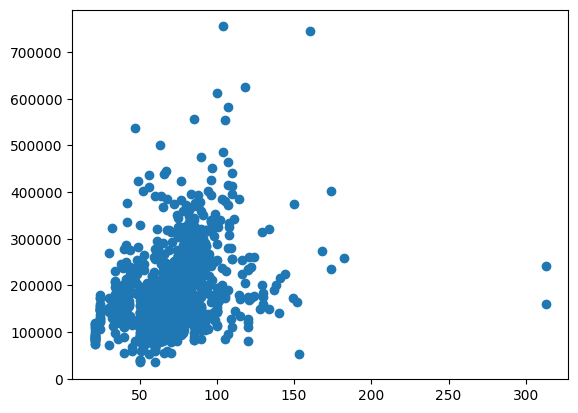

In [64]:

# Visualize LotFrontage vs SalePrice
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)  # positive trend with outliers


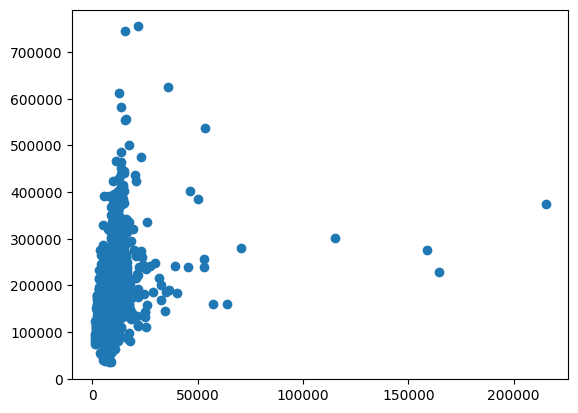

In [65]:

# Visualize LotArea vs SalePrice
plt.scatter(x='LotArea', y='SalePrice', data=train_df)


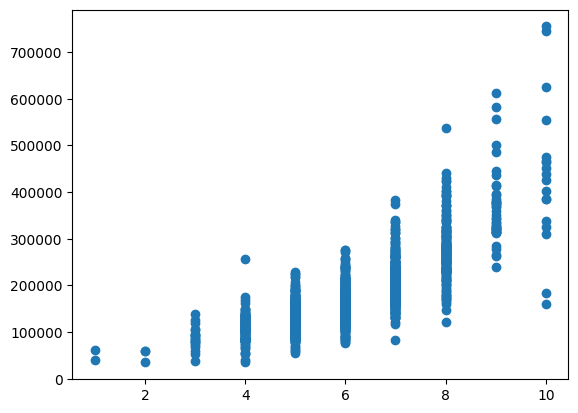

In [66]:

# Visualize OverallQual vs SalePrice
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)


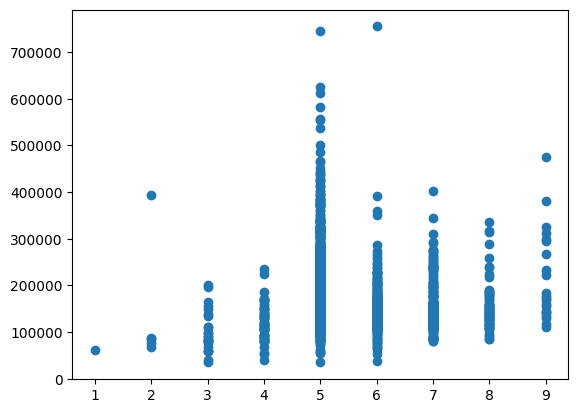

In [67]:

# Visualize OverallCond vs SalePrice
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)


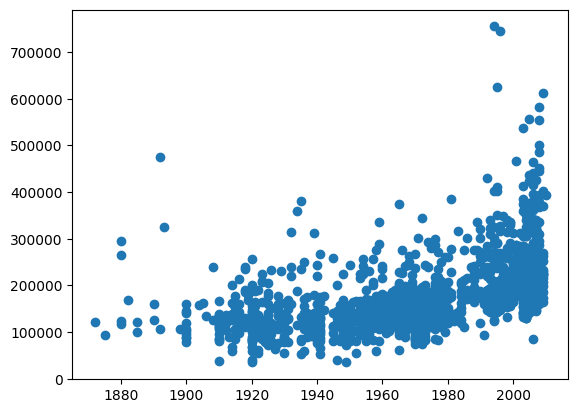

In [68]:

# Visualize YearBuilt vs SalePrice
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)


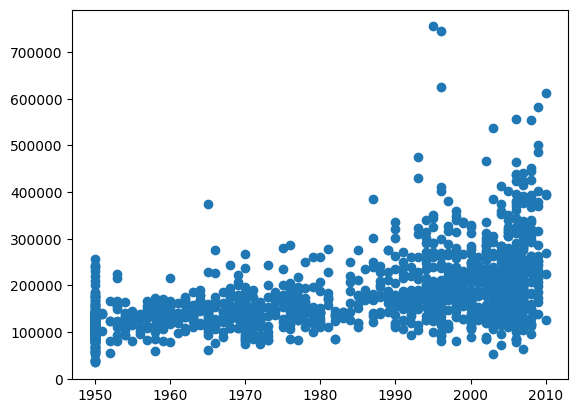

In [69]:

# Visualize YearRemodAdd vs SalePrice
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)


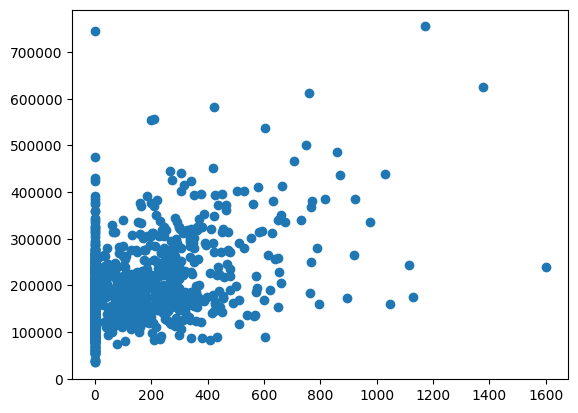

In [70]:

# Visualize MasVnrArea vs SalePrice
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

## 5. Outlier Detection and Removal

Detect outliers using queries and z-score analysis, and prepare a list of IDs to drop from the dataset.

In [71]:
# Identify outliers using queries
train_df.query('LotFrontage > 300')  # Drop id 935 and 1299
train_df.query('LotArea > 55000')    # Drop id 250, 314, 336, 707, maybe 1397


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,250,50,RL,NaN,159000,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,Shed,500,6,2007,WD,Normal,277000
313,314,20,RL,150.0,215245,Pave,NaN,IR3,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,375000
335,336,190,RL,NaN,164660,Grvl,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,Shed,700,8,2008,WD,Normal,228950
451,452,20,RL,62.0,70761,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,12,2006,WD,Normal,280000
706,707,20,RL,NaN,115149,Pave,NaN,IR2,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,302000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
1396,1397,20,RL,NaN,57200,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,160000


In [72]:

# Z-score analysis for LotArea
pd.Series(stats.zscore(train_df['LotArea']), index=train_df.index).sort_values().tail(10)


384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
dtype: float64

In [73]:

# Prepare list of IDs to drop
dropValues = [935,1299,250,314,336,707,524,379,1183,692,186,692,1170,298,441,739,598,955,636,49,810,534,496,198]
# Uncomment to drop outliers
train_df = train_df[train_df.Id.isin(dropValues) == False]

## 6. Missing Value Analysis and Imputation

Analyze missing values, visualize unique values for categorical features, and impute missing data using appropriate strategies for each column.

In [74]:
# Analyze missing values
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)


,0
PoolQC,1433
MiscFeature,1385
Alley,1348
Fence,1161
MasVnrType,860
FireplaceQu,683
LotFrontage,256
GarageQual,75
GarageFinish,75
GarageType,75


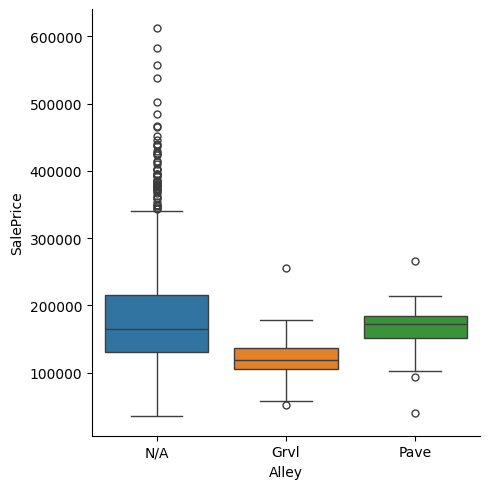

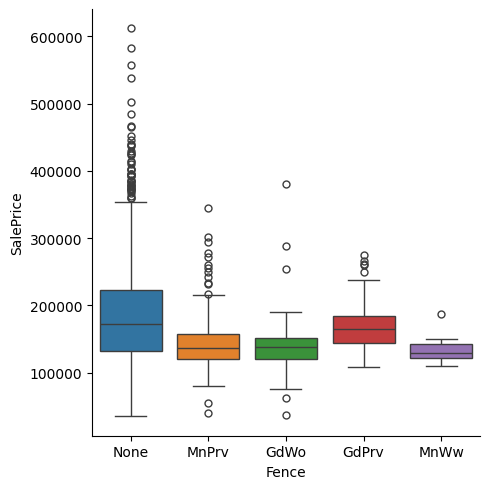

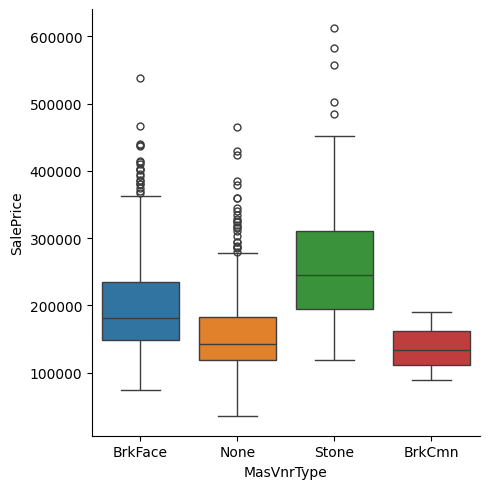

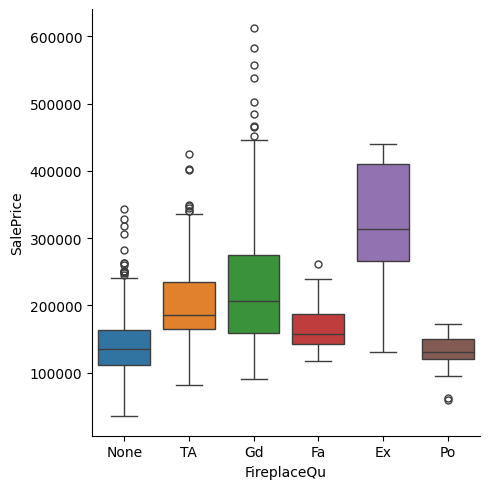

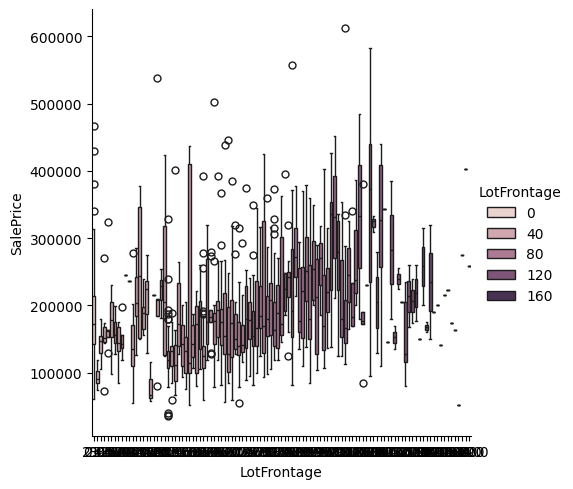

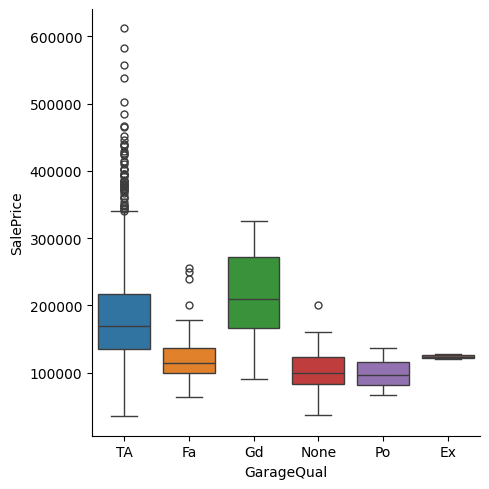

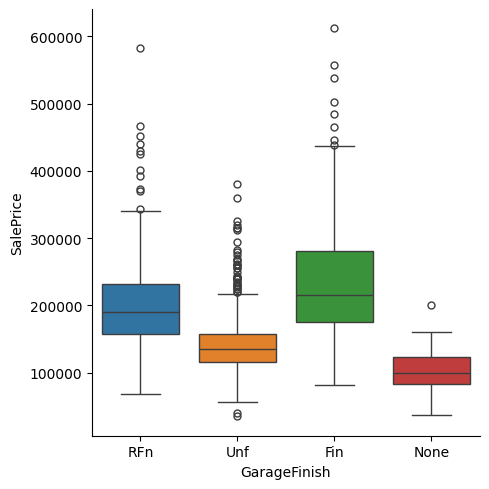

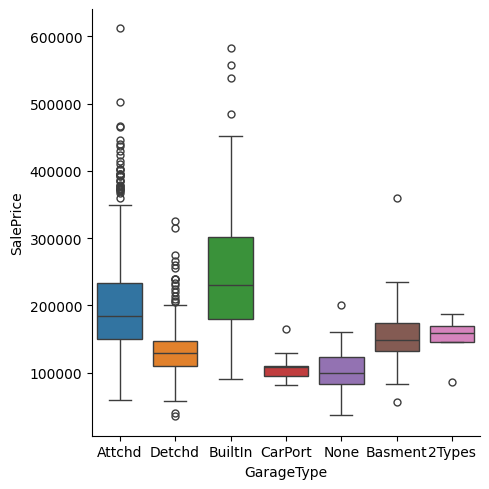

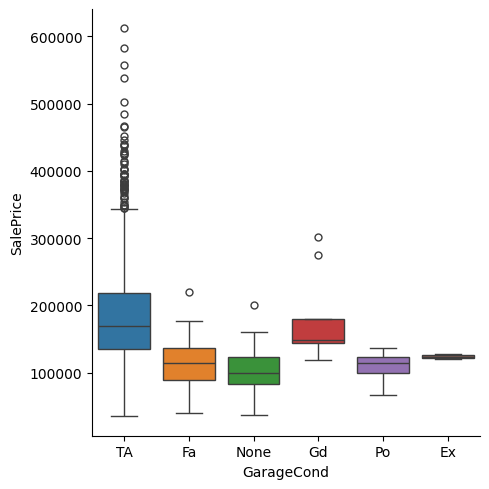

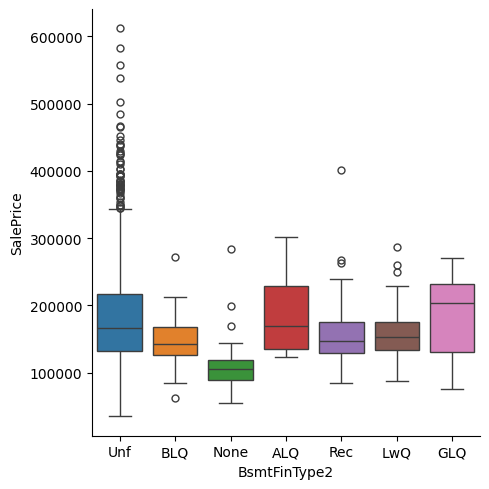

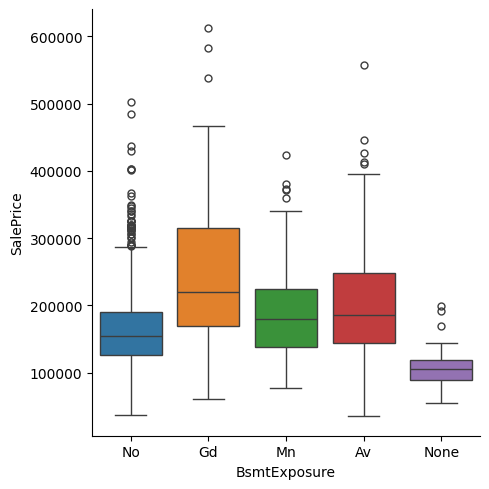

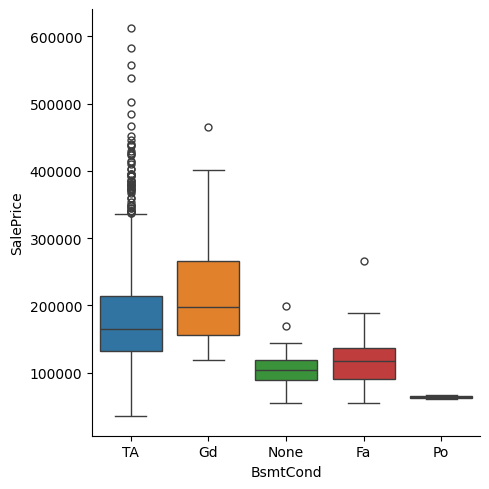

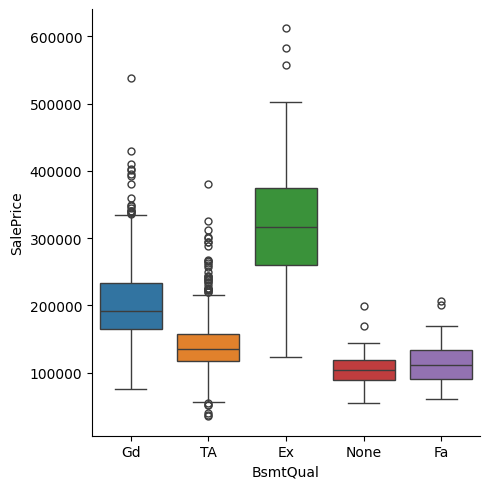

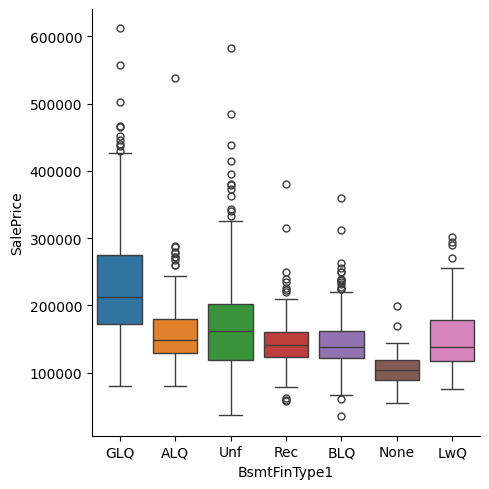

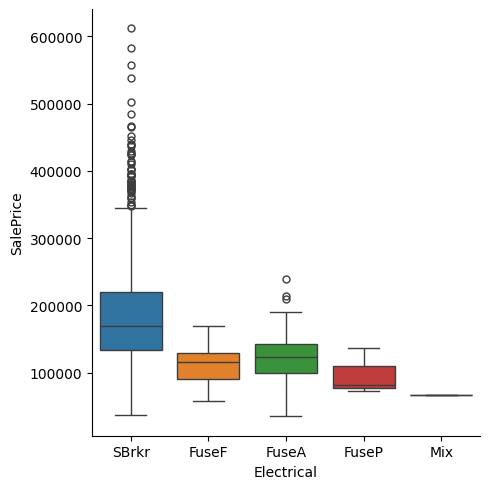

In [ ]:

# Impute missing values for categorical features
train_df['Alley'] = train_df['Alley'].fillna('N/A')
test_df['Alley'] = test_df['Alley'].fillna('N/A')
sns.catplot(x='Alley', y='SalePrice', data=train_df, kind='box', hue='Alley')

train_df['Fence'] = train_df['Fence'].fillna('None')
test_df['Fence'] = test_df['Fence'].fillna('None')
sns.catplot(x='Fence', y='SalePrice', data=train_df, kind='box', hue='Fence')

train_df['MasVnrType'] = train_df['MasVnrType'].fillna('None')
test_df['MasVnrType'] = test_df['MasVnrType'].fillna('None')
sns.catplot(x='MasVnrType', y='SalePrice', data=train_df, kind='box', hue='MasVnrType')

train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna('0')
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna('0')
train_df['BsmtFullBath'] = train_df['BsmtFullBath'].fillna(0)


train_df['FireplaceQu'] = train_df['FireplaceQu'].fillna('None')
test_df['FireplaceQu'] = test_df['FireplaceQu'].fillna('None')
sns.catplot(x='FireplaceQu', y='SalePrice', data=train_df, kind='box', hue='FireplaceQu')

train_df['LotFrontage'] = train_df['LotFrontage'].fillna(0)
test_df['LotFrontage'] = test_df['LotFrontage'].fillna(0)


train_df['GarageQual'] = train_df['GarageQual'].fillna('None')
test_df['GarageQual'] = test_df['GarageQual'].fillna('None')
sns.catplot(x='GarageQual', y='SalePrice', data=train_df, kind='box', hue='GarageQual')

train_df['GarageFinish'] = train_df['GarageFinish'].fillna('None')
test_df['GarageFinish'] = test_df['GarageFinish'].fillna('None')
sns.catplot(x='GarageFinish', y='SalePrice', data=train_df, kind='box', hue='GarageFinish')

train_df['GarageType'] = train_df['GarageType'].fillna('None')
test_df['GarageType'] = test_df['GarageType'].fillna('None')    
sns.catplot(x='GarageType', y='SalePrice', data=train_df, kind='box', hue='GarageType')

train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna('YearBuilt')
test_df['GarageYrBlt'] = test_df['GarageYrBlt'].fillna('YearBuilt')


train_df['GarageCond'] = train_df['GarageCond'].fillna('None')
test_df['GarageCond'] = test_df['GarageCond'].fillna('None')
sns.catplot(x='GarageCond', y='SalePrice', data=train_df, kind='box', hue='GarageCond')


train_df['BsmtFinType2'] = train_df['BsmtFinType2'].fillna('None')
test_df['BsmtFinType2'] = test_df['BsmtFinType2'].fillna('None')
sns.catplot(x='BsmtFinType2', y='SalePrice', data=train_df, kind='box', hue='BsmtFinType2')

train_df['BsmtExposure'] = train_df['BsmtExposure'].fillna('None')
test_df['BsmtExposure'] = test_df['BsmtExposure'].fillna('None')
sns.catplot(x='BsmtExposure', y='SalePrice', data=train_df, kind='box', hue='BsmtExposure')

train_df['BsmtCond'] = train_df['BsmtCond'].fillna('None')
test_df['BsmtCond'] = test_df['BsmtCond'].fillna('None')
sns.catplot(x='BsmtCond', y='SalePrice', data=train_df, kind='box', hue='BsmtCond')

train_df['BsmtQual'] = train_df['BsmtQual'].fillna('None')
test_df['BsmtQual'] = test_df['BsmtQual'].fillna('None')
sns.catplot(x='BsmtQual', y='SalePrice', data=train_df, kind='box', hue='BsmtQual')

train_df['BsmtFinType1'] = train_df['BsmtFinType1'].fillna('None')
test_df['BsmtFinType1'] = test_df['BsmtFinType1'].fillna('None')
sns.catplot(x='BsmtFinType1', y='SalePrice', data=train_df, kind='box', hue='BsmtFinType1')

train_df['Electrical'] = train_df['Electrical'].fillna('SBrkr')
test_df['Electrical'] = test_df['Electrical'].fillna('SBrkr')
sns.catplot(x='Electrical', y='SalePrice', data=train_df, kind='box', hue='Electrical')

## 7. Feature Engineering

Create new features such as HouseAge, RemodAge, TotalSF, TotalBath, and TotalPorchSF to enhance model performance.

In [76]:
# Feature engineering
train_df['HouseAge'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

train_df['RemodAge'] = train_df['YrSold'] - train_df['YearRemodAdd']
test_df['RemodAge'] = test_df['YrSold'] - test_df['YearRemodAdd']

train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['TotalBath'] = train_df['FullBath'] + 0.5 * train_df['HalfBath'] + train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath']
test_df['TotalBath'] = test_df['FullBath'] + 0.5 * test_df['HalfBath'] + test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath']

train_df['TotalPorchSF'] = train_df['OpenPorchSF'] + train_df['EnclosedPorch'] + train_df['3SsnPorch'] + train_df['ScreenPorch']
test_df['TotalPorchSF'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']

## 8. Feature Selection and Correlation Analysis

Drop unnecessary columns, compute and visualize the correlation matrix, and remove highly correlated features.

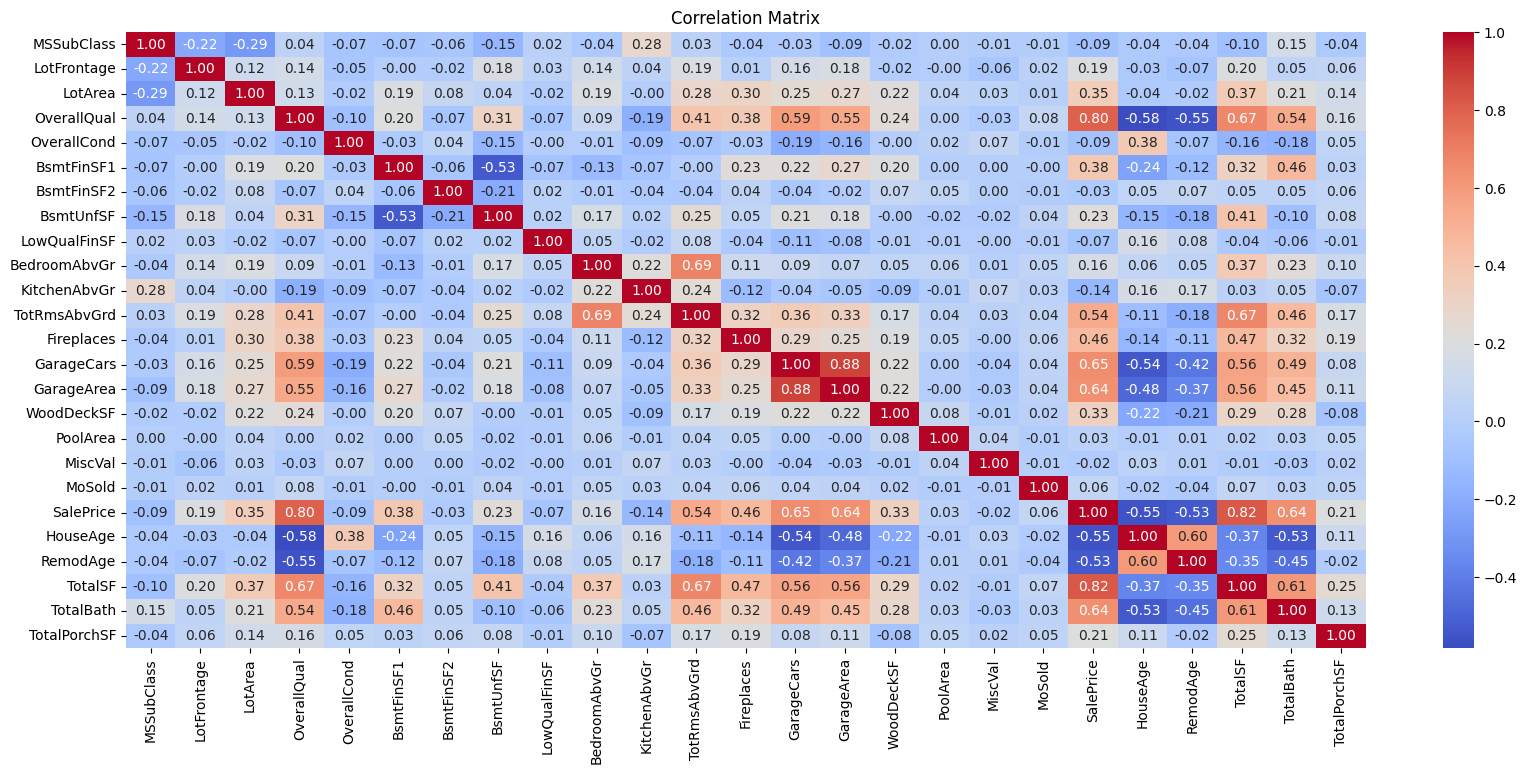

In [77]:
# Drop columns not needed for modeling
train_df = train_df.drop(columns=['Alley','PoolQC','MiscFeature','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])
test_df = test_df.drop(columns=['Alley','PoolQC','MiscFeature','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])

# Drop redundant columns after feature engineering
train_df = train_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea'])
test_df_id = test_df['Id']
test_df = test_df.drop(columns=['Id','YrSold','YearBuilt','YearRemodAdd', 'TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath','BsmtFullBath','BsmtHalfBath','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GrLivArea'])

# Correlation matrix
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')

# Drop highly correlated features
train_df.drop(columns=['GarageArea'], inplace=True)
test_df.drop(columns=['GarageArea'], inplace=True)

## 9. Target Variable Transformation

Visualize the distribution of SalePrice and apply log transformation to reduce skewness.

<Axes: xlabel='SalePrice', ylabel='Count'>

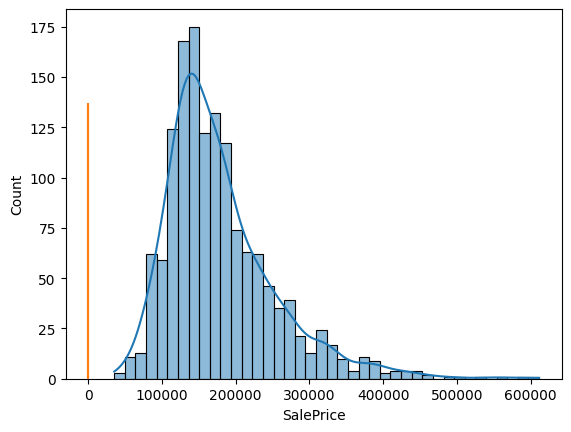

In [78]:
# Visualize SalePrice distribution
sns.histplot(train_df['SalePrice'], kde=True)

# Log transform the target variable
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Visualize transformed SalePrice
sns.histplot(train_df['SalePrice'], kde=True)

## 10. Preprocessing Pipelines

Define and build preprocessing pipelines for numerical, ordinal, and nominal categorical features using scikit-learn's Pipeline and ColumnTransformer.

In [79]:
# Identify columns for encoding
ode_cols = ['LotShape', 'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','CentralAir', 'HeatingQC', 'KitchenQual', 'Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'PavedDrive']
ohe_cols = ['MSSubClass', 'MSZoning', 'Street', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical','GarageType', 'SaleType', 'SaleCondition']

# Numerical columns
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
num_cols = num_cols.drop('SalePrice')

# Pipelines
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

ode_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

ohe_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Column transformer
col_trans = ColumnTransformer(transformers=[
    ('num_pip', num_pipeline, num_cols),
    ('ode_pip', ode_pipeline, ode_cols),
    ('ohe_pip', ohe_pipeline, ohe_cols)
], remainder='passthrough', n_jobs=-1)

## 11. Train/Test Split

Split the preprocessed data into training and validation sets for model evaluation.

In [80]:
# Prepare features and target
X = train_df.drop(columns=['SalePrice'])
Y = train_df['SalePrice']

# Preprocess features
pipeline = Pipeline(steps=[
    ('preprocessing', col_trans)
])
X_preprocessed = pipeline.fit_transform(X)

# Train/test split
X_train, X_val, Y_train, Y_val = train_test_split(X_preprocessed, Y, test_size=0.2, random_state=42)

## 12. Linear Regression Model

Train a Linear Regression model, predict on validation set, calculate RMSE, and visualize actual vs predicted values.

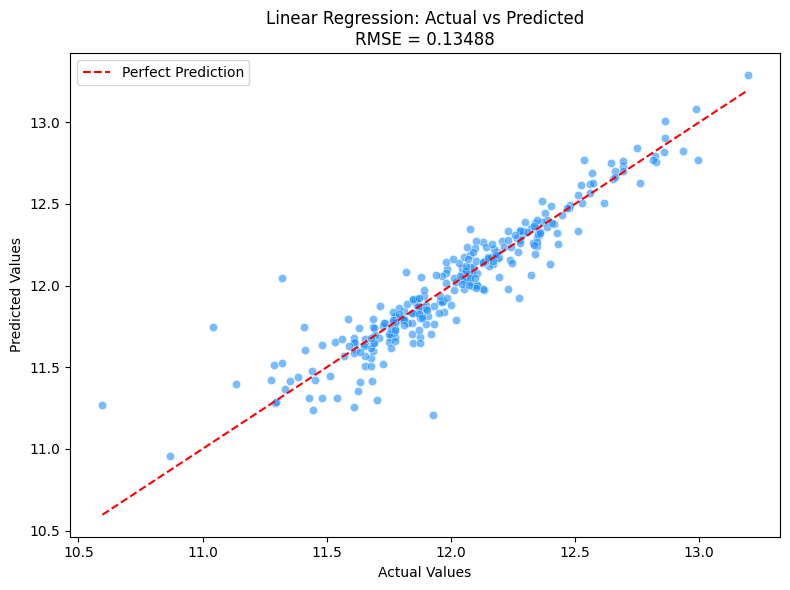

In [81]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
lr_pred = lr.predict(X_val)
lr_rmse = np.sqrt(mean_squared_error(Y_val, lr_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=lr_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Linear Regression: Actual vs Predicted\nRMSE = {lr_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 13. Ridge Regression Model

Perform hyperparameter tuning with GridSearchCV, train Ridge Regression, evaluate RMSE, and plot predictions.

{'alpha': 10.0, 'solver': 'auto'}
0.10632842744060933


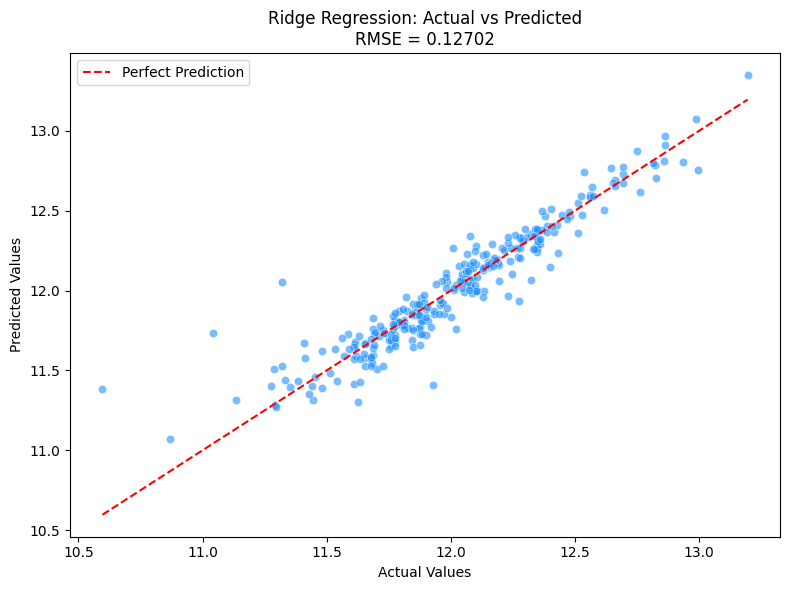

In [82]:
ridge = Ridge()
ridge_param_grid = {
    'alpha': [0.1, 1.0, 10.0, 50.0, 100.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
ridge_cv = GridSearchCV(estimator=ridge, param_grid=ridge_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, Y_train)
ridge_best = ridge_cv.best_estimator_
print(ridge_cv.best_params_)
print(np.sqrt(-1 * ridge_cv.best_score_))
ridge_pred = ridge_best.predict(X_val)
ridge_rmse = np.sqrt(mean_squared_error(Y_val, ridge_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=ridge_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Ridge Regression: Actual vs Predicted\nRMSE = {ridge_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 14. Lasso Regression Model

Perform hyperparameter tuning with GridSearchCV, train Lasso Regression, evaluate RMSE, and plot predictions.

{'alpha': 0.001, 'max_iter': 250}
0.1077126228059884


c:\Users\ledoe\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.103e-01, tolerance: 1.750e-02
  model = cd_fast.enet_coordinate_descent(


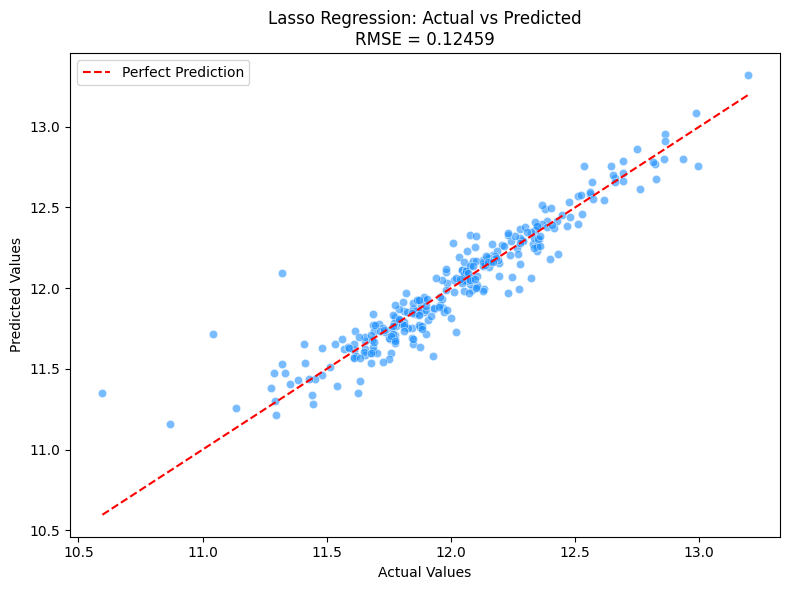

In [83]:
lasso = Lasso()
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0],
    'max_iter': [50, 100, 250, 500, 700, 1000]
}
lasso_cv = GridSearchCV(estimator=lasso, param_grid=lasso_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, Y_train)
lasso_best = lasso_cv.best_estimator_
print(lasso_cv.best_params_)
print(np.sqrt(-1 * lasso_cv.best_score_))
lasso_pred = lasso_best.predict(X_val)
lasso_rmse = np.sqrt(mean_squared_error(Y_val, lasso_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=lasso_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Lasso Regression: Actual vs Predicted\nRMSE = {lasso_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 15. Polynomial Regression Model

Train Polynomial Regression models with different degrees, evaluate RMSE, and visualize predictions.

   Degree      RMSE
0       1  0.134878
1       2  0.336238


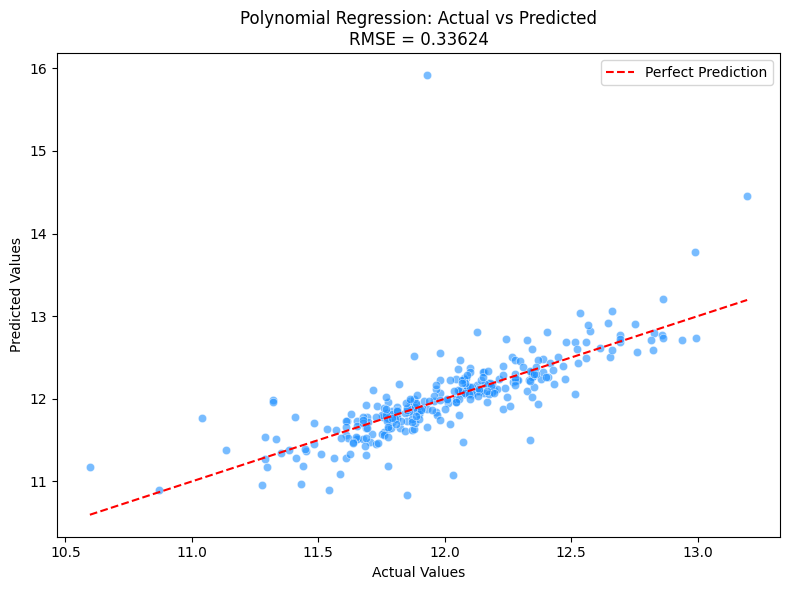

In [84]:
degrees = [1, 2]
results = []

for d in degrees:
    pr = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    pr.fit(X_train, Y_train)
    pr_pred = pr.predict(X_val)
    pr_rmse = np.sqrt(mean_squared_error(Y_val, pr_pred))
    results.append((d, pr_rmse))

results_df = pd.DataFrame(results, columns=["Degree", "RMSE"])
print(results_df)

# Plot predictions for last degree
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=pr_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Polynomial Regression: Actual vs Predicted\nRMSE = {pr_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 16. Support Vector Regression Model

Perform hyperparameter tuning with GridSearchCV, train SVR, evaluate RMSE, and plot predictions.

{'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
0.13172651268795887


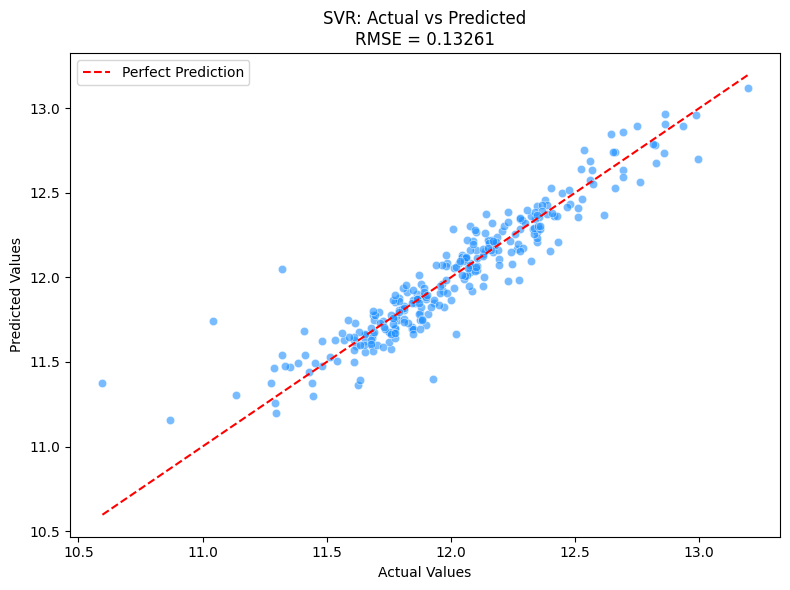

In [85]:
svr = SVR()
svr_param_grid = {
    'kernel': ['rbf'],
    'C': [10, 100, 500],
    'gamma': ['scale']
}
svr_cv = GridSearchCV(estimator=svr, param_grid=svr_param_grid, cv=3, n_jobs=1, scoring='neg_mean_squared_error')
svr_cv.fit(X_train, Y_train)
svr_best = svr_cv.best_estimator_
print(svr_cv.best_params_)
print(np.sqrt(-1 * svr_cv.best_score_))
svr_pred = svr_best.predict(X_val)
svr_rmse = np.sqrt(mean_squared_error(Y_val, svr_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=svr_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'SVR: Actual vs Predicted\nRMSE = {svr_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 17. Decision Tree Regression Model

Perform hyperparameter tuning with GridSearchCV, train Decision Tree Regressor, evaluate RMSE, and plot predictions.

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
0.1769272898161851


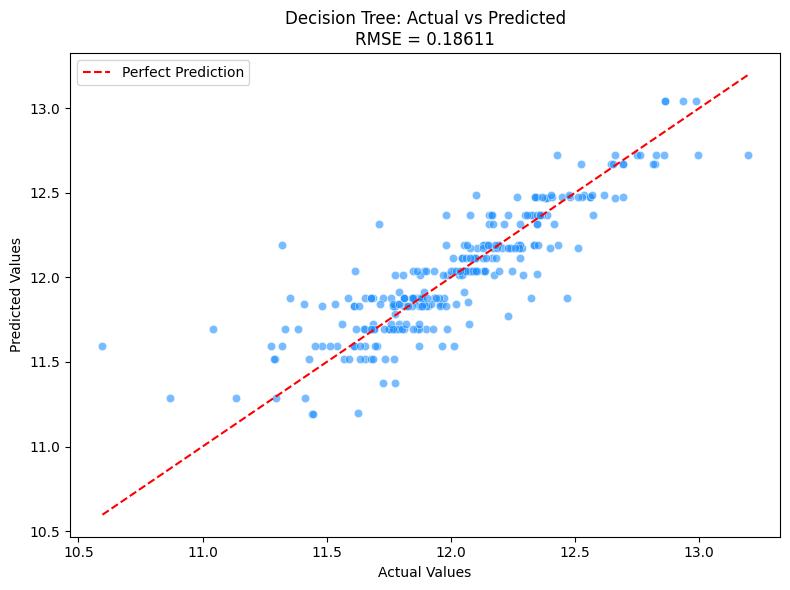

In [86]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtr_cv = GridSearchCV(estimator=dtr, param_grid=dtr_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
dtr_cv.fit(X_train, Y_train)
dtr_best = dtr_cv.best_estimator_
print(dtr_cv.best_params_)
print(np.sqrt(-1 * dtr_cv.best_score_))
dtr_pred = dtr_best.predict(X_val)
dtr_rmse = np.sqrt(mean_squared_error(Y_val, dtr_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=dtr_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Decision Tree: Actual vs Predicted\nRMSE = {dtr_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 18. Random Forest Regression Model

Perform hyperparameter tuning with GridSearchCV, train Random Forest Regressor, evaluate RMSE, and plot predictions.

In [ ]:
rfr = RandomForestRegressor(random_state=42)
rfr_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rfr_cv = GridSearchCV(estimator=rfr, param_grid=rfr_param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
rfr_cv.fit(X_train, Y_train)
rfr_best = rfr_cv.best_estimator_
print(rfr_cv.best_params_)
print(np.sqrt(-1 * rfr_cv.best_score_))

rfr_pred = rfr_best.predict(X_val)
rfr_rmse = np.sqrt(mean_squared_error(Y_val, rfr_pred))

# Plot predictions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_val, y=rfr_pred, color='dodgerblue', alpha=0.6)
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Random Forest: Actual vs Predicted\nRMSE = {rfr_rmse:.5f}')
plt.legend()
plt.tight_layout()
plt.show()

## 19. Model Comparison

Compare all trained models using RMSE and R² scores, and display results in a summary table.

In [ ]:
results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Polynomial", "SVR", "Decision Tree", "Random Forest"],
    "RMSE": [
        np.sqrt(mean_squared_error(Y_val, lr_pred)),
        np.sqrt(mean_squared_error(Y_val, ridge_pred)),
        np.sqrt(mean_squared_error(Y_val, lasso_pred)),
        np.sqrt(mean_squared_error(Y_val, pr_pred)),
        np.sqrt(mean_squared_error(Y_val, svr_pred)),
        np.sqrt(mean_squared_error(Y_val, dtr_pred)),
        np.sqrt(mean_squared_error(Y_val, rfr_pred))
    ],
    "R² Score": [
        r2_score(Y_val, lr_pred),
        r2_score(Y_val, ridge_pred),
        r2_score(Y_val, lasso_pred),
        r2_score(Y_val, pr_pred),
        r2_score(Y_val, svr_pred),
        r2_score(Y_val, dtr_pred),
        r2_score(Y_val, rfr_pred)
    ]
})
print(results)

           Model      RMSE  R² Score
0         Linear  0.134878  0.873346
1          Ridge  0.127019  0.887676
2          Lasso  0.124590  0.891931
3     Polynomial  0.336238  0.212898
4            SVR  0.132611  0.877567
5  Decision Tree  0.186107  0.758864
6  Random Forest  0.143691  0.856255


## 20. Test Set Predictions

Apply trained models to the test set, reverse log transformation, and prepare predictions for submission.

In [ ]:
X_test = test_df
X_test_preprocessed = pipeline.transform(X_test)

Y_pred0 = lr.predict(X_test_preprocessed)
Y_pred0 = np.expm1(Y_pred0)  # reverse log1p

Y_pred1 = ridge_cv.predict(X_test_preprocessed)
Y_pred1 = np.expm1(Y_pred1)

Y_pred2 = lasso_cv.predict(X_test_preprocessed)
Y_pred2 = np.expm1(Y_pred2)

Y_pred3 = pr.predict(X_test_preprocessed)
Y_pred3 = np.expm1(Y_pred3)

Y_pred4 = dtr_cv.predict(X_test_preprocessed)
Y_pred4 = np.expm1(Y_pred4)

Y_pred5 = rfr_cv.predict(X_test_preprocessed)
Y_pred5 = np.expm1(Y_pred5)

Y_pred6 = svr_cv.predict(X_test_preprocessed)
Y_pred6 = np.expm1(Y_pred6)

## 21. Submission File Creation

Create submission DataFrames for each model and save them as CSV files for Kaggle submission.

In [ ]:
submission_lr = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred0
})
submission_ridge = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred1
})
submission_lasso = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred2
})
submission_poly = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred3
})
submission_dtr = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred4
})
submission_rfr = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred5
})
submission_svr = pd.DataFrame({
    'Id': test_df_id,
    'SalePrice': Y_pred6
})

# Save submissions
submission_lr.to_csv('../submissions/submission_lr.csv', index=False)
submission_ridge.to_csv('../submissions/submission_ridge.csv', index=False)
submission_lasso.to_csv('../submissions/submission_lasso.csv', index=False)
submission_poly.to_csv('../submissions/submission_poly.csv', index=False)
submission_dtr.to_csv('../submissions/submission_dtr.csv', index=False)
submission_rfr.to_csv('../submissions/submission_rfr.csv', index=False)
submission_svr.to_csv('../submissions/submission_svr.csv', index=False)